# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import math as mt

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

### Shapiro-Wilk and Q-Q plot (Teste de normalidade)


In [5]:
athletes.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [6]:
sample1 = get_sample(athletes, 'height', n=3000)

In [7]:
sample1.describe()

count    3000.000000
mean        1.765007
std         0.113121
min         1.370000
25%         1.680000
50%         1.760000
75%         1.840000
max         2.150000
Name: height, dtype: float64

Supondo a hipótese nula como a normalidade dos dados e alfa = 0.05.

In [56]:
res1 = sct.shapiro(sample1)
print('O valor estatístico do teste é: {}, enquanto o valor-p: {}'.format(res1[0], res1[1]))

O valor estatístico do teste é: 0.9961956143379211, enquanto o valor-p: 6.589900749531807e-07


Tem-se evidência significativa para a rejeição da hipótese nula caso o valor-p fosse menor que 0.05, o que de fato aconteceu. Dessa forma, conclui-se que os dados não vieram de uma distribuição normal.

Usando o Q-Q plot e o histograma dos dados para enriquecer a conclusão.

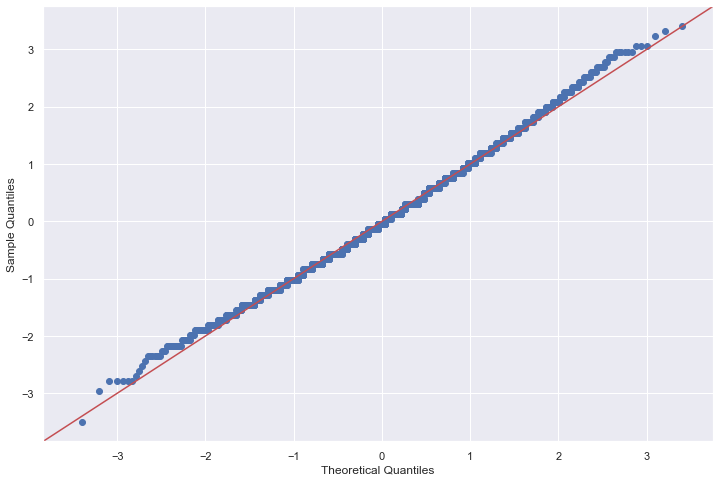

In [9]:
sm.qqplot(sample1, fit = True, line = '45');

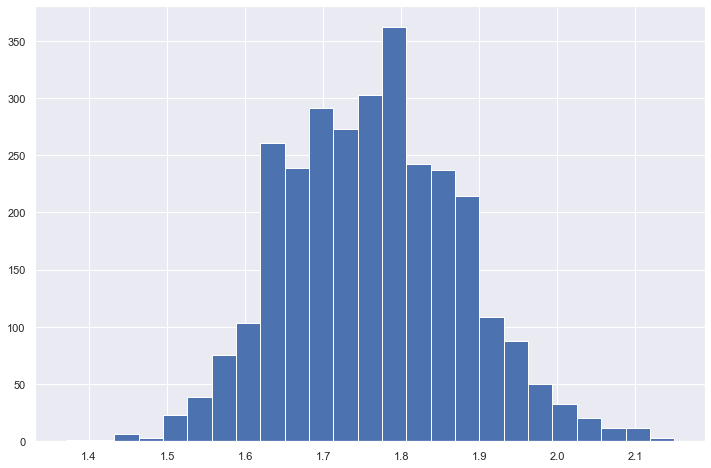

In [10]:
plt.hist(sample1, bins=25)
plt.show()

In [11]:
def q1():
    return False

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

__Para refletir__:

* Esse resultado faz sentido?

### Teste de Jarque-Bera (Teste de normalidade)

Assim como o teste de Shapiro-Wilk, tem-se hipótese nula como a normalidade dos dados e alfa de 0.05. Um valor-p menor que 0.05 significa que temos evidência para rejeição da hipótese nula.

In [12]:
sample1.head(10)

6276     1.66
5800     1.67
8542     1.84
3306     1.80
826      1.82
671      1.78
1803     1.68
3617     1.68
11157    1.64
8287     1.80
Name: height, dtype: float64

In [13]:
sample1.describe()

count    3000.000000
mean        1.765007
std         0.113121
min         1.370000
25%         1.680000
50%         1.760000
75%         1.840000
max         2.150000
Name: height, dtype: float64

In [51]:
res2 = sct.jarque_bera(sample1)
print('O valor estatístico do teste é: {}, enquanto o valor-p: {}'.format(res2[0],res2[1]))

O valor estatístico do teste é: 21.4851361990714, enquanto o valor-p: 2.1605382175216015e-05


A conclusão do teste de Jarque-Bera é a mesma do teste de Shapiro-Wilk, o que era esperado já que a diferença dos testes encontra-se somente nos métodos estatísticos utilizados.

In [15]:
def q2():
    return False

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

### Teste de D'Agostino-Pearson (Teste de normalidade)

#### Análise simples

Diferente dos outros casos, aqui o tamanho da amostrá será n = 3000 e será sobre o peso dos atletas.

In [16]:
sample2 = get_sample(athletes, 'weight', n= 3000)
sample2.head(10)

1242     98.0
4551     70.0
6616     82.0
260      68.0
11144    59.0
10695    68.0
7568     67.0
4030     65.0
7933     62.0
11024    68.0
Name: weight, dtype: float64

In [17]:
sample2.describe()

count    3000.000000
mean       72.268667
std        16.515611
min        34.000000
25%        60.000000
50%        70.000000
75%        81.000000
max       170.000000
Name: weight, dtype: float64

Ainda considerando alfa igual a 0.05 e a hipótese nula de que os dados vieram de uma distribuição normal.

In [48]:
res3 = sct.normaltest(sample2)
print('O valor estatístico do teste é: {}, enquanto o valor-p: {}'.format(round(res3.statistic,2), round(res3.pvalue,8)))

O valor estatístico do teste é: 596.68, enquanto o valor-p: 0.0


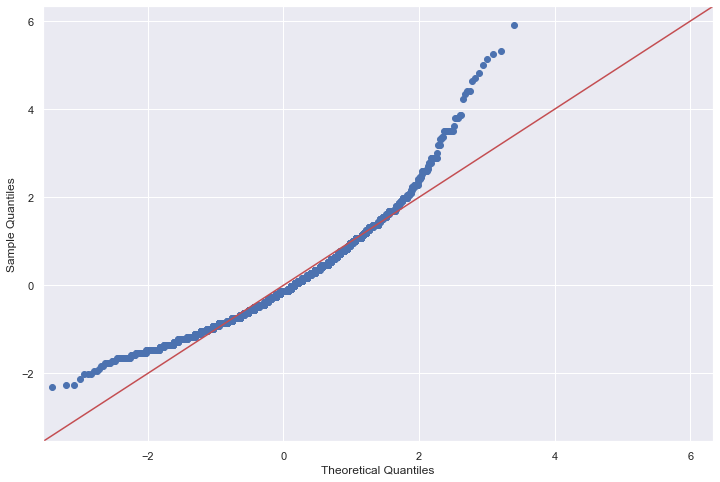

In [19]:
sm.qqplot(sample2, fit= True, line= '45');

Observando o valor-p do teste e o Q-Q plot, temos evidência para rejeitar a normalidade dos dados. Pode-se então usar um histograma para um melhor entendimento

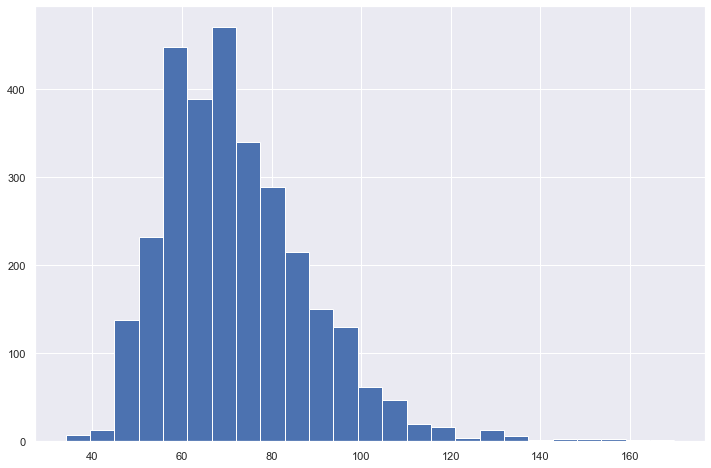

In [20]:
plt.hist(sample2, bins= 25)
plt.show()

Visualmente fica mais claro que os as amostras não são uma distruibuição normal.

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

In [21]:
def q3():
    return False

## Questão 4

Realize uma transformação logarítmica na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

#### Transformação Logarítimica


In [22]:
sample2_log = sample2.transform(lambda x : mt.log(x, 10))
sample2_log.head(10)

1242     1.991226
4551     1.845098
6616     1.913814
260      1.832509
11144    1.770852
10695    1.832509
7568     1.826075
4030     1.812913
7933     1.792392
11024    1.832509
Name: weight, dtype: float64

Utilizando alfa como 0.05 e a hipótese nula de que os dados podem ser descritos por uma distribuição normal.

In [46]:
res4 = sct.normaltest(sample2_log)
print('O valor estatístico do teste é: {}, enquanto o valor-p: {}'.format(round(res4.statistic,2), round(res4.pvalue,8)))

O valor estatístico do teste é: 54.03, enquanto o valor-p: 0.0


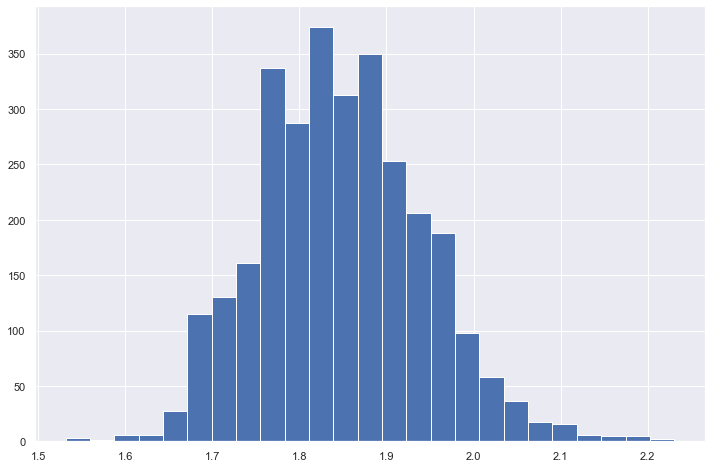

In [24]:
plt.hist(sample2_log, bins= 25)
plt.show()

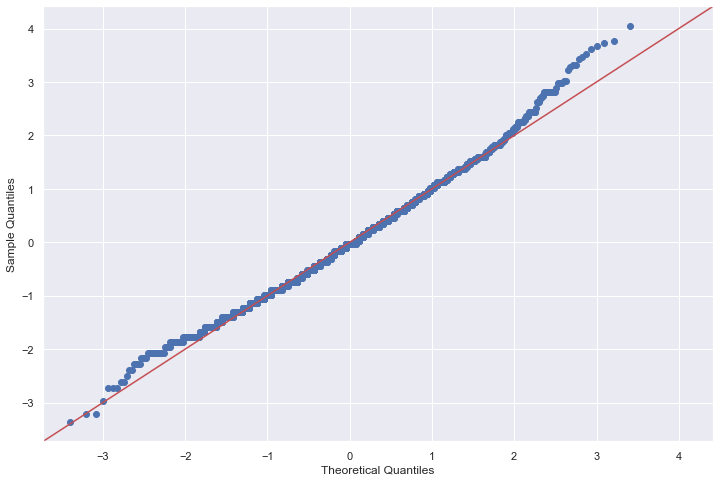

In [25]:
sm.qqplot(sample2_log, fit= True, line= '45');

In [26]:
def q4():
    return False

> __Para as questão 5, 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

### Separando atletas brasileiros, canadenses e americanos

Para os 3 conjuntos, usa-se a política de excluir dados NaN.

In [27]:
bra = athletes[athletes['nationality'] == 'BRA']
bra = bra[bra['height'].isna() == False]
bra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 79 to 11457
Data columns (total 11 columns):
id             476 non-null int64
name           476 non-null object
nationality    476 non-null object
sex            476 non-null object
dob            476 non-null object
height         476 non-null float64
weight         466 non-null float64
sport          476 non-null object
gold           476 non-null int64
silver         476 non-null int64
bronze         476 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 44.6+ KB


In [28]:
can = athletes[athletes['nationality'] == 'CAN']
can = can[can['height'].isna() == False]
can.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 2 to 11401
Data columns (total 11 columns):
id             320 non-null int64
name           320 non-null object
nationality    320 non-null object
sex            320 non-null object
dob            320 non-null object
height         320 non-null float64
weight         317 non-null float64
sport          320 non-null object
gold           320 non-null int64
silver         320 non-null int64
bronze         320 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 30.0+ KB


In [29]:
usa = athletes[athletes['nationality'] == 'USA']
usa = usa[usa['height'].isna() == False]
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 6 to 11439
Data columns (total 11 columns):
id             560 non-null int64
name           560 non-null object
nationality    560 non-null object
sex            560 non-null object
dob            560 non-null object
height         560 non-null float64
weight         552 non-null float64
sport          560 non-null object
gold           560 non-null int64
silver         560 non-null int64
bronze         560 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 52.5+ KB


## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

### Teste Student-t (Teste de média)

#### Brasileiros e americanos

Para afirmar sobre a diferença das amostras é necessário realizar um teste de hipótese, o teste t de Student considera a variânca das duas amostras iguais, logo, usa-se o teste-t de Welch que pode ser implementado passando o parâmetro equal_var como False. Aqui a hipótese nula é de que a média das duas populações é idêntica e define-se como alfa 0.05.

In [45]:
res5 = sct.ttest_ind(bra['height'], usa['height'])
print('O valor estatístico do teste é: {}, enquanto o valor-p: {}'.format(res5.statistic, res5.pvalue))

O valor estatístico do teste é: -3.2197616412697903, enquanto o valor-p: 0.001322927779592141


De acordo com o teste tem-se evidência para recusar a hipótese nula, para entender melhor então as amostras é útil o plot dos histogramas.

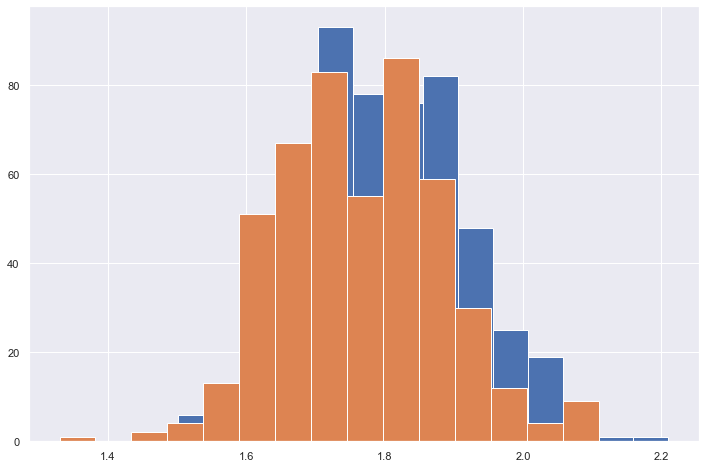

In [31]:
plt.hist(usa['height'], bins= 15)
plt.hist(bra['height'], bins= 15)
plt.show()

Trazendo as médias dos conjuntos para explorar a diferença dos dados, tem-se:

In [32]:
print('Brasileiros: {}, Americanos: {}'.format(round(bra['height'].mean(),2), round(usa['height'].mean(),2)))

Brasileiros: 1.76, Americanos: 1.79


In [33]:
def q5():
    return False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

#### Brasileiros e canadenses

Repetindo o processo anterior, mas agora comparando brasileiros e canadenses com alfa de 0.05.

In [44]:
res6 = sct.ttest_ind(bra['height'], can['height'], equal_var= False)
print('O valor estatístico do teste é: {}, enquanto o valor-p: {}'.format(res6.statistic, res6.pvalue))

O valor estatístico do teste é: 0.638930491436537, enquanto o valor-p: 0.5230827295443041


Com o alfa que foi definido não rejeita-se a hipótese nula de que a média dos dois conjuntos é igual. Trazendo o histograma das amostra para melhor visualização.

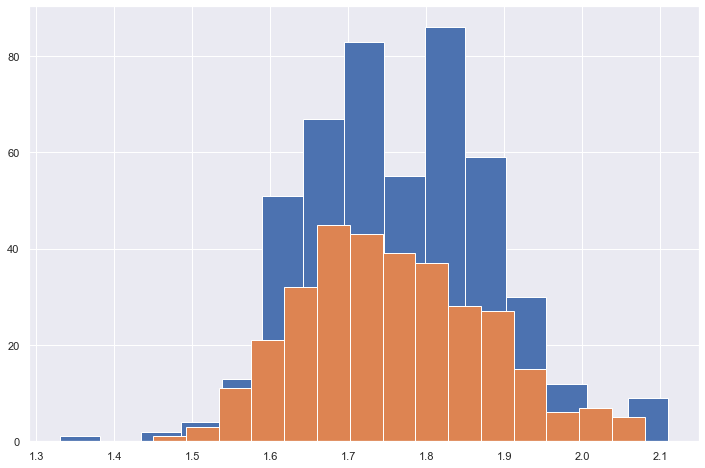

In [35]:
plt.hist(bra['height'], bins=15)
plt.hist(can['height'], bins=15)
plt.show()

Trazendo as médias dos conjuntos para explorar a semelhança dos dados, tem-se:

In [36]:
print('Brasileiros: {}, Canadenses: {}'.format(round(bra['height'].mean(),2), round(can['height'].mean(),2)))

Brasileiros: 1.76, Canadenses: 1.76


In [37]:
def q6():
    return True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

#### Canadenses e americanos

Utilizando as amostras dos outros dois casos.

Realizando os testes.

In [61]:
res7 = sct.ttest_ind(can['height'], usa['height'], equal_var= False)
print('O valor estatístico do teste é: {}, enquanto o valor-p: {}'.format(res7.statistic, round(res7.pvalue,8)))

O valor estatístico do teste é: -3.5094939427693164, enquanto o valor-p: 0.00047179


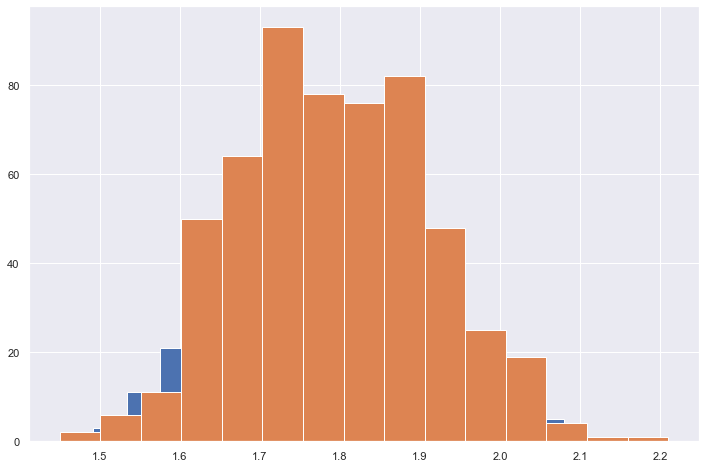

In [39]:
plt.hist(can['height'], bins= 15)
plt.hist(usa['height'], bins= 15)
plt.show()

In [63]:
def q7():
    return float(round(res7.pvalue,8))